In [1]:
import time
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
import numpy as np

import bvcopula
import utils
import select_copula

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
animal = 'ST264'
dayN = 4
day_name = 'Day{}'.format(dayN)
path = '/home/nina/VRData/Processing/pkls'

n1 = 0
n2 = 1

X,Y = utils.load_experimental_data(path, animal, day_name, n1, n2)
exp_pref = '{}_{}'.format(animal,day_name)

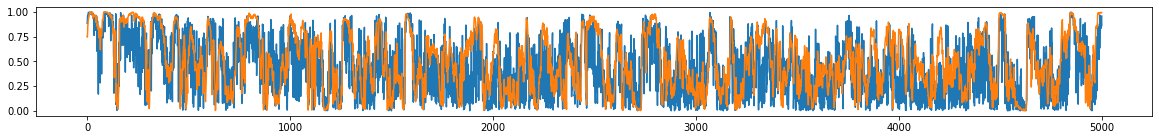

In [10]:
plt.figure(figsize=(20,2))
plt.plot(Y[:5000,])

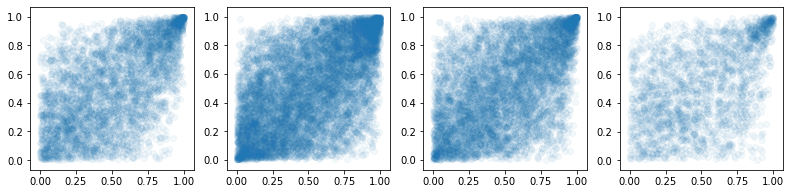

In [11]:
fig, ax = plt.subplots(1,4,figsize=(13.5,3))
ax[0].scatter(*Y[X[:,0]<6/16].T,alpha=0.05)
ax[1].scatter(*Y[(X[:,0]>=6/16) & (X[:,0]<12/16)].T,alpha=0.05)
ax[2].scatter(*Y[(X[:,0]>=12/16) & (X[:,0]<14/16)].T,alpha=0.05)
ax[3].scatter(*Y[(X[:,0]>=14/16) & (X[:,0]<1)].T,alpha=0.05)

In [12]:
X.shape

(22418, 1)

In [13]:
import logging
import sys
log = logging.getLogger()
log.setLevel(logging.DEBUG)
#log.addHandler(logging.StreamHandler(sys.stdout))

%time (model, waic) = select_copula.select_copula_model(X,Y,torch.device("cuda:1"),exp_pref,'./imgs',n1,n2)

Trying Independence
Trying Independence
WAIC=0, took 0 sec
WAIC=0, took 0 sec
Trying Gaussian
Trying Gaussian
Converged in 500 steps!
Converged in 500 steps!
WAIC=4734, took 19 sec
WAIC=4734, took 19 sec
Trying Frank
Trying Frank
Converged in 900 steps!
Converged in 900 steps!
WAIC=4205, took 26 sec
WAIC=4205, took 26 sec
Trying Clayton0°
Trying Clayton0°
Converged in 300 steps!
Converged in 300 steps!
WAIC=2666, took 7 sec
WAIC=2666, took 7 sec
Trying Clayton90°
Trying Clayton90°
Training does not look promissing!
Training does not look promissing!
WAIC=-1590, took 27 sec
WAIC=-1590, took 27 sec
Trying Clayton180°
Trying Clayton180°
Converged in 300 steps!
Converged in 300 steps!
WAIC=4670, took 7 sec
WAIC=4670, took 7 sec
Trying Clayton270°
Trying Clayton270°
Training does not look promissing!
Training does not look promissing!
WAIC=-1526, took 27 sec
WAIC=-1526, took 27 sec
Trying Gumbel0°
Trying Gumbel0°
Converged in 500 steps!
Converged in 500 steps!
WAIC=4904, took 13 sec
WAIC=49

Removing ./imgs/w_ST264_Day4_0-1_FrankGaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_FrankGaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton0°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton0°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton90°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton90°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton180°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton180°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton270°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Clayton270°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel90°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel90°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel180°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel180°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel270°GaussianGumbel0°.pth
Removing ./imgs/w_ST264_Day4_0-1_Gumbel270°Gaussia

In [7]:
from GPUtil import showUtilization as gpu_usage
gpu_usage()

ModuleNotFoundError: No module named 'GPUtil'

In [ ]:
import pickle as pkl

In [ ]:
with open('./out/ST263_Day4_239_models.pkl','rb') as f:
    data = pkl.load(f)

In [ ]:
data[6,14]